/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(



Classification Report:
               precision    recall  f1-score   support

      Normal       0.74      0.85      0.79      2497
       Relay       0.82      0.71      0.76      2498

    accuracy                           0.78      4995
   macro avg       0.78      0.78      0.78      4995
weighted avg       0.78      0.78      0.78      4995



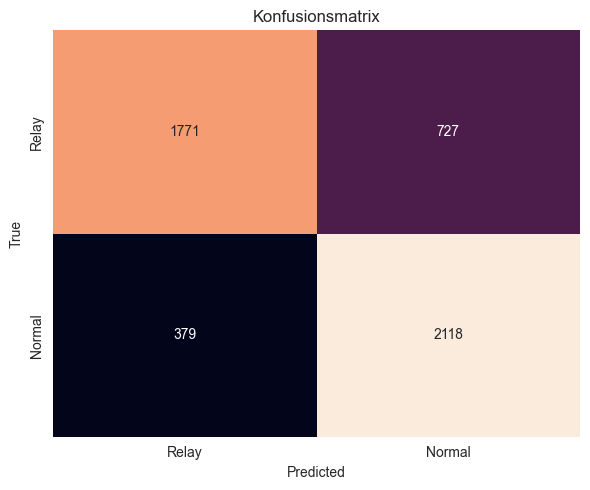

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, classification_report

# --- load your data ---
with h5py.File("datasets/features_S01_combined.h5", "r") as f:
    norm_grp  = f["features/S01/1/Normal/c_data"]
    relay_grp = f["features/S01/1/Relay/c_data"]
    D = norm_grp["0"].shape[0]

    data_norm  = np.zeros((49997, D))
    data_relay = np.zeros((49998, D))
    for i in range(49997):
        try: data_norm[i]  = norm_grp[str(i)][:]
        except KeyError: pass
    for i in range(49998):
        try: data_relay[i] = relay_grp[str(i)][:]
        except KeyError: pass

# split
X_train_norm     = data_norm[:47500]
X_test_norm      = data_norm[47500:]
X_test_relay     = data_relay[47500:]
X_test           = np.vstack((X_test_norm, X_test_relay))
y_true           = np.array([0]*len(X_test_norm) + [1]*len(X_test_relay))

# --- fit GMM on normals only ---
gmm = GaussianMixture(
    n_components=80,          # try 2–5 components to capture normal variability
    covariance_type="full",
    random_state=0,
    max_iter=1000
)
gmm.fit(X_train_norm)

# --- choose a threshold on train log-likelihoods ---
train_ll = gmm.score_samples(X_train_norm)
# e.g. mark bottom 5% of normal likelihoods as “anomaly” boundary
threshold = np.percentile(train_ll, 2)

# --- score test data & predict ---
test_ll = gmm.score_samples(X_test)
# if log-likelihood below threshold ⇒ anomaly (relay)
y_pred = (test_ll < threshold).astype(int)

# cm und report
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

# plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Relay","Normal"],
            yticklabels=["Relay","Normal"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Konfusionsmatrix")
plt.tight_layout()
plt.show()



Classification Report:
               precision    recall  f1-score   support

      Normal       0.77      0.77      0.77      2497
       Relay       0.77      0.77      0.77      2498

    accuracy                           0.77      4995
   macro avg       0.77      0.77      0.77      4995
weighted avg       0.77      0.77      0.77      4995



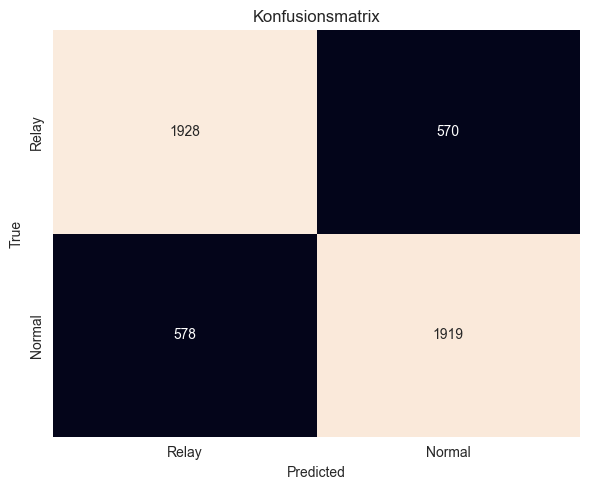

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, classification_report

# --- load your data ---
with h5py.File("datasets/features_S01_combined.h5", "r") as f:
    norm_grp  = f["features/S01/1/Normal/c_data"]
    relay_grp = f["features/S01/1/Relay/c_data"]
    D = norm_grp["0"].shape[0]

    data_norm  = np.zeros((49997, D))
    data_relay = np.zeros((49998, D))
    for i in range(49997):
        try: data_norm[i]  = norm_grp[str(i)][:]
        except KeyError: pass
    for i in range(49998):
        try: data_relay[i] = relay_grp[str(i)][:]
        except KeyError: pass

# split
X_train_norm     = data_norm[:47500]
X_test_norm      = data_norm[47500:]
X_test_relay     = data_relay[47500:]
X_test           = np.vstack((X_test_norm, X_test_relay))
y_true           = np.array([0]*len(X_test_norm) + [1]*len(X_test_relay))

# --- fit GMM on normals only ---
gmm = GaussianMixture(
    n_components=80,          # try 2–5 components to capture normal variability
    covariance_type="full",
    random_state=0,
    max_iter=1000
)
gmm.fit(X_train_norm)

# --- choose a threshold on train log-likelihoods ---
train_ll = gmm.score_samples(X_train_norm)
# e.g. mark bottom 5% of normal likelihoods as “anomaly” boundary
threshold = np.percentile(train_ll, 5)

# --- score test data & predict ---
test_ll = gmm.score_samples(X_test)
# if log-likelihood below threshold ⇒ anomaly (relay)
y_pred = (test_ll < threshold).astype(int)

# cm und report
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

# plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Relay","Normal"],
            yticklabels=["Relay","Normal"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Konfusionsmatrix")
plt.tight_layout()
plt.show()



Classification Report:
               precision    recall  f1-score   support

      Normal       0.79      0.70      0.74      2497
       Relay       0.73      0.81      0.77      2498

    accuracy                           0.76      4995
   macro avg       0.76      0.76      0.76      4995
weighted avg       0.76      0.76      0.76      4995



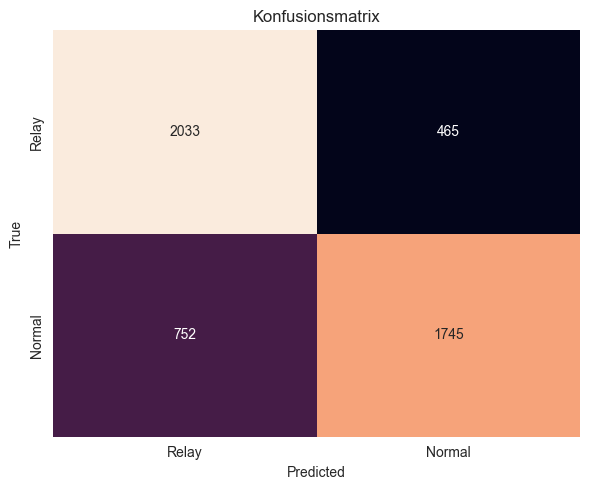

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, classification_report

# --- load your data ---
with h5py.File("datasets/features_S01_combined.h5", "r") as f:
    norm_grp  = f["features/S01/1/Normal/c_data"]
    relay_grp = f["features/S01/1/Relay/c_data"]
    D = norm_grp["0"].shape[0]

    data_norm  = np.zeros((49997, D))
    data_relay = np.zeros((49998, D))
    for i in range(49997):
        try: data_norm[i]  = norm_grp[str(i)][:]
        except KeyError: pass
    for i in range(49998):
        try: data_relay[i] = relay_grp[str(i)][:]
        except KeyError: pass

# split
X_train_norm     = data_norm[:47500]
X_test_norm      = data_norm[47500:]
X_test_relay     = data_relay[47500:]
X_test           = np.vstack((X_test_norm, X_test_relay))
y_true           = np.array([0]*len(X_test_norm) + [1]*len(X_test_relay))

# --- fit GMM on normals only ---
gmm = GaussianMixture(
    n_components=80,          # try 2–5 components to capture normal variability
    covariance_type="full",
    random_state=0,
    max_iter=1000
)
gmm.fit(X_train_norm)

# --- choose a threshold on train log-likelihoods ---
train_ll = gmm.score_samples(X_train_norm)
# e.g. mark bottom 5% of normal likelihoods as “anomaly” boundary
threshold = np.percentile(train_ll, 10)

# --- score test data & predict ---
test_ll = gmm.score_samples(X_test)
# if log-likelihood below threshold ⇒ anomaly (relay)
y_pred = (test_ll < threshold).astype(int)

# cm und report
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

# plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Relay","Normal"],
            yticklabels=["Relay","Normal"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Konfusionsmatrix")
plt.tight_layout()
plt.show()


1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.57      0.99      0.72      2497
       Relay       0.96      0.24      0.38      2498

    accuracy                           0.61      4995
   macro avg       0.76      0.61      0.55      4995
weighted avg       0.76      0.61      0.55      4995



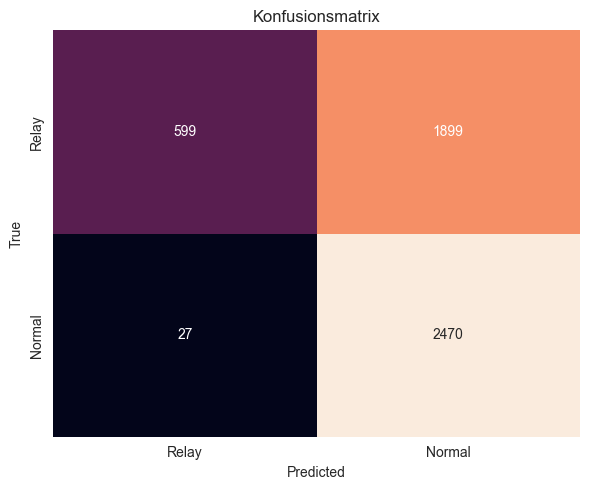

2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.98      0.73      2497
       Relay       0.94      0.30      0.45      2498

    accuracy                           0.64      4995
   macro avg       0.76      0.64      0.59      4995
weighted avg       0.76      0.64      0.59      4995



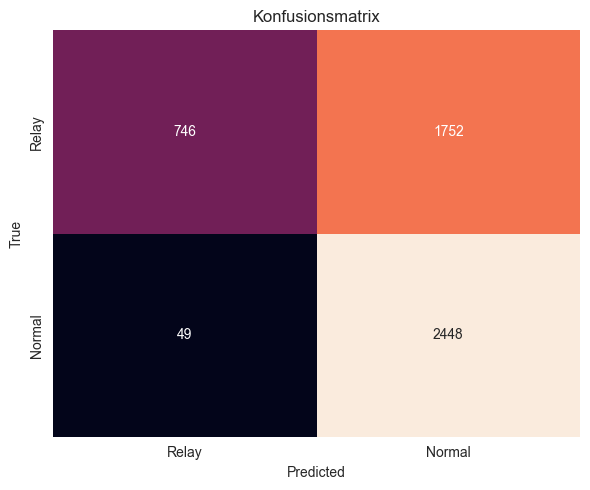

5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.60      0.95      0.74      2497
       Relay       0.87      0.37      0.52      2498

    accuracy                           0.66      4995
   macro avg       0.74      0.66      0.63      4995
weighted avg       0.74      0.66      0.63      4995



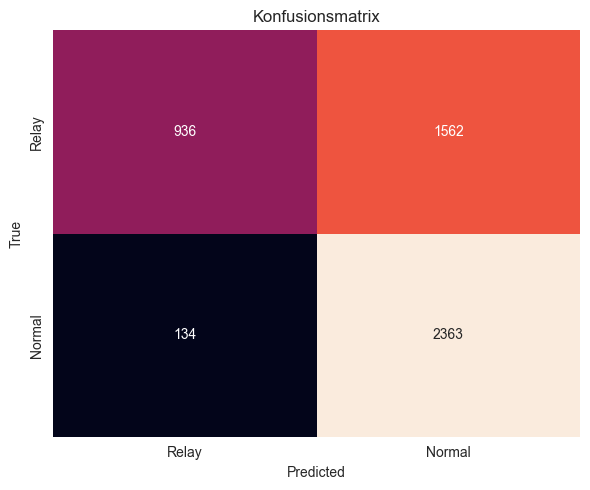

10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.63      0.90      0.74      2497
       Relay       0.83      0.48      0.60      2498

    accuracy                           0.69      4995
   macro avg       0.73      0.69      0.67      4995
weighted avg       0.73      0.69      0.67      4995



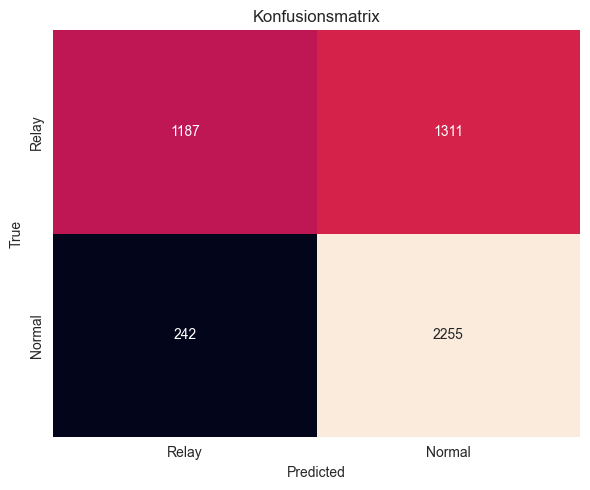

12

Classification Report:
               precision    recall  f1-score   support

      Normal       0.63      0.88      0.74      2497
       Relay       0.80      0.49      0.61      2498

    accuracy                           0.69      4995
   macro avg       0.72      0.69      0.67      4995
weighted avg       0.72      0.69      0.67      4995



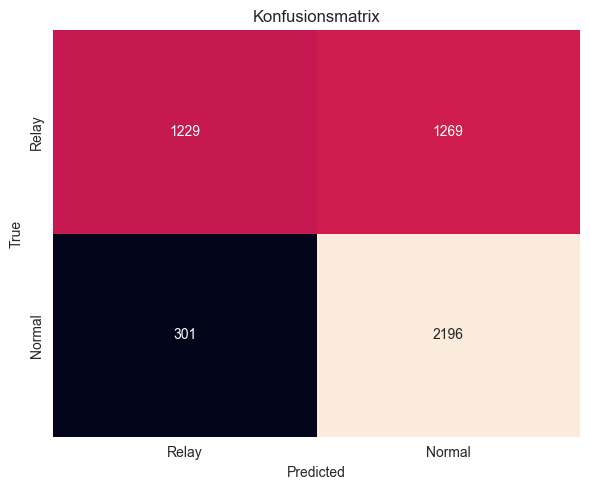

15

Classification Report:
               precision    recall  f1-score   support

      Normal       0.63      0.85      0.72      2497
       Relay       0.77      0.51      0.61      2498

    accuracy                           0.68      4995
   macro avg       0.70      0.68      0.67      4995
weighted avg       0.70      0.68      0.67      4995



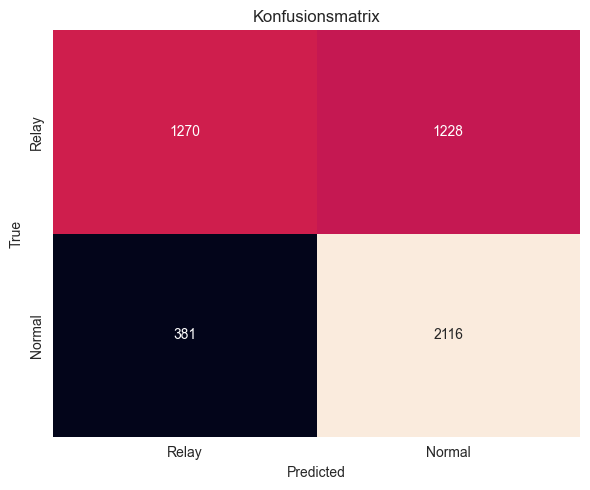

20

Classification Report:
               precision    recall  f1-score   support

      Normal       0.63      0.80      0.71      2497
       Relay       0.73      0.54      0.62      2498

    accuracy                           0.67      4995
   macro avg       0.68      0.67      0.66      4995
weighted avg       0.68      0.67      0.66      4995



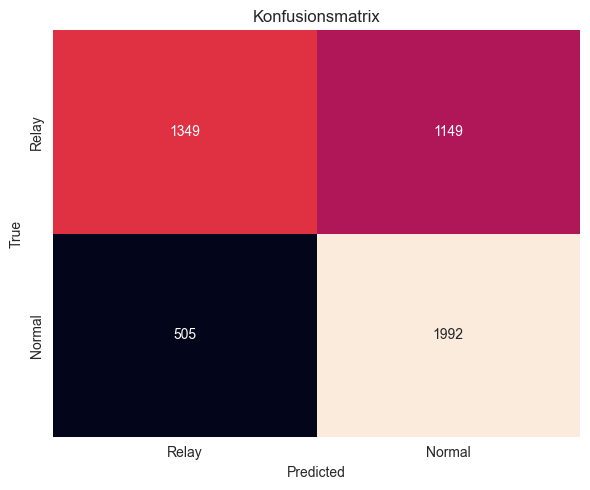

In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, classification_report

# --- load your data ---
with h5py.File("datasets/features_S01_combined.h5", "r") as f:
    norm_grp  = f["features/S01/1/Normal/c_data"]
    relay_grp = f["features/S01/1/Relay/c_data"]
    D = norm_grp["0"].shape[0]

    data_norm  = np.zeros((49997, D))
    data_relay = np.zeros((49998, D))
    for i in range(49997):
        try: data_norm[i]  = norm_grp[str(i)][:]
        except KeyError: pass
    for i in range(49998):
        try: data_relay[i] = relay_grp[str(i)][:]
        except KeyError: pass

# split
X_train_norm     = data_norm[:47500]
X_test_norm      = data_norm[47500:]
X_test_relay     = data_relay[47500:]
X_test           = np.vstack((X_test_norm, X_test_relay))
y_true           = np.array([0]*len(X_test_norm) + [1]*len(X_test_relay))

# --- fit GMM on normals only ---
gmm = GaussianMixture(
    n_components=1,          # try 2–5 components to capture normal variability
    covariance_type="diag",
    random_state=0,
    max_iter=1000
)
gmm.fit(X_train_norm)

# --- choose a threshold on train log-likelihoods ---
train_ll = gmm.score_samples(X_train_norm)
# e.g. mark bottom 5% of normal likelihoods as “anomaly” boundary

threshold = np.percentile(train_ll, 5)

# --- score test data & predict ---
test_ll = gmm.score_samples(X_test)
# if log-likelihood below threshold ⇒ anomaly (relay)
y_pred = (test_ll < threshold).astype(int)

# cm und report
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

# plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Relay","Normal"],
            yticklabels=["Relay","Normal"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Konfusionsmatrix")
plt.tight_layout()
plt.show()


In [15]:
import h5py
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# --- Daten laden (wie gehabt) ---
with h5py.File("datasets/features_S01_combined.h5", "r") as f:
    norm_grp  = f["features/S01/1/Normal/c_data"]
    relay_grp = f["features/S01/1/Relay/c_data"]
    D = norm_grp["0"].shape[0]

    data_norm  = np.zeros((49997, D))
    data_relay = np.zeros((49998, D))
    for i in range(49997):
        try: data_norm[i]  = norm_grp[str(i)][:]
        except KeyError: pass
    for i in range(49998):
        try: data_relay[i] = relay_grp[str(i)][:]
        except KeyError: pass

X_train_norm     = data_norm[:47500]
X_test_norm      = data_norm[47500:]
X_test_relay     = data_relay[47500:]
X_test           = np.vstack((X_test_norm, X_test_relay))
y_true           = np.array([0]*len(X_test_norm) + [1]*len(X_test_relay))

# --- Grid-Search Parameter definieren ---
param_grid = {
    "n_components":       [1, 2, 3, 4, 5],
    "covariance_type":    ["full", "tied", "diag", "spherical"],
    "threshold_percentile": [1, 2, 5, 10]
}

results = []

# --- Grid-Search Loop ---
for n in param_grid["n_components"]:
    for cov in param_grid["covariance_type"]:
        for perc in param_grid["threshold_percentile"]:
            # 1) GMM auf normalen Daten trainieren
            gmm = GaussianMixture(
                n_components=n,
                covariance_type=cov,
                random_state=0,
                max_iter=1000
            )
            gmm.fit(X_train_norm)

            # 2) Schwellenwert auf Basis der Trainings-Likelihoods
            train_ll  = gmm.score_samples(X_train_norm)
            threshold = np.percentile(train_ll, perc)

            # 3) Testdaten auswerten
            test_ll = gmm.score_samples(X_test)
            y_pred  = (test_ll < threshold).astype(int)

            # 4) Metriken berechnen
            acc = accuracy_score(y_true, y_pred)
            results.append({
                "n_components": n,
                "covariance_type": cov,
                "threshold_%": perc,
                "accuracy": acc
            })

# --- Ergebnisse auswerten ---
df_results = pd.DataFrame(results)
df_top10   = df_results.sort_values("accuracy", ascending=False).head(10)
print("Top 10 Konfigurationen nach Accuracy:\n", df_top10)

best = df_top10.iloc[0]
print("\nBeste Konfiguration:")
print(best)

# Optional: Detail-Report für das beste Modell
best_gmm = GaussianMixture(
    n_components=int(best["n_components"]),
    covariance_type=best["covariance_type"],
    random_state=0,
    max_iter=1000
)
best_gmm.fit(X_train_norm)
thr = np.percentile(best_gmm.score_samples(X_train_norm), best["threshold_%"])
y_best = (best_gmm.score_samples(X_test) < thr).astype(int)

print("\nConfusion Matrix (Relay=1, Normal=0):")
print(confusion_matrix(y_true, y_best))
print("\nClassification Report:")
print(classification_report(y_true, y_best, target_names=["Normal","Relay"]))


Top 10 Konfigurationen nach Accuracy:
     n_components covariance_type  threshold_%  accuracy
19             2            full           10  0.715716
71             5            tied           10  0.715315
39             3            tied           10  0.708709
23             2            tied           10  0.707508
55             4            tied           10  0.707307
3              1            full           10  0.706507
7              1            tied           10  0.706507
35             3            full           10  0.693694
70             5            tied            5  0.691892
18             2            full            5  0.691491

Beste Konfiguration:
n_components              2
covariance_type        full
threshold_%              10
accuracy           0.715716
Name: 19, dtype: object

Confusion Matrix (Relay=1, Normal=0):
[[2234  263]
 [1157 1341]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.66      0.89      0.7

In [ ]:
import h5py
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# --- 1) Daten laden ---
with h5py.File("datasets/features_S01_combined.h5", "r") as f:
    norm_grp  = f["features/S01/1/Normal/c_data"]
    relay_grp = f["features/S01/1/Relay/c_data"]
    D = norm_grp["0"].shape[0]

    data_norm  = np.zeros((49997, D))
    data_relay = np.zeros((49998, D))
    for i in range(49997):
        try: data_norm[i]  = norm_grp[str(i)][:]
        except KeyError: pass
    for i in range(49998):
        try: data_relay[i] = relay_grp[str(i)][:]
        except KeyError: pass

X_train_norm = data_norm[:47500]
X_test_norm  = data_norm[47500:]
X_test_relay = data_relay[47500:]
X_test       = np.vstack((X_test_norm, X_test_relay))
y_true       = np.array([0]*len(X_test_norm) + [1]*len(X_test_relay))

# --- 2) Grid-Parameter definieren ---
param_grid = {
    "n_components":       [1, 2, 3, 4, 5],
    "covariance_type":    ["full", "tied", "diag", "spherical"],
    "reg_covar":          [1e-6, 1e-3, 1e-1],
    "n_init":             [1, 5, 10],
    "threshold_percentile": [1, 2, 3, 4, 5]
}

results = []

# --- 3) brute‐force Grid-Search mit Constraint FPR ≤ 5% ---
for n in param_grid["n_components"]:
    for cov in param_grid["covariance_type"]:
        for reg in param_grid["reg_covar"]:
            for init in param_grid["n_init"]:
                for perc in param_grid["threshold_percentile"]:
                    # a) GMM nur auf Normal-Daten trainieren
                    gmm = GaussianMixture(
                        n_components=n,
                        covariance_type=cov,
                        reg_covar=reg,
                        n_init=init,
                        max_iter=1000,
                        random_state=0
                    )
                    gmm.fit(X_train_norm)

                    # b) Threshold aus Trainings-Likelihoods
                    train_ll  = gmm.score_samples(X_train_norm)
                    threshold = np.percentile(train_ll, perc)

                    # c) Test-Daten bewerten
                    test_ll = gmm.score_samples(X_test)
                    y_pred  = (test_ll < threshold).astype(int)

                    # d) FPR auf Normal-Test ermitteln
                    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
                    fpr_norm = fp / (fp + tn)

                    # nur Konfigurationen mit FPR ≤ 5 % behalten
                    if fpr_norm <= 0.05:
                        results.append({
                            "n_components":       n,
                            "covariance_type":    cov,
                            "reg_covar":          reg,
                            "n_init":             init,
                            "threshold_%":        perc,
                            "accuracy":           accuracy_score(y_true, y_pred),
                            "precision_relay":    precision_score(y_true, y_pred),
                            "recall_relay":       recall_score(y_true, y_pred),
                            "f1_relay":           f1_score(y_true, y_pred),
                            "fpr_norm":           fpr_norm
                        })

# --- 4) Ergebnisse auswerten ---
df = pd.DataFrame(results)
df_sorted = df.sort_values("accuracy", ascending=False)

print("Top 5 Konfigurationen (FPR ≤ 5 %):")
print(df_sorted.head())

# --- 5) Detail für beste Konfiguration ---
best = df_sorted.iloc[0]
print("\nBeste Konfiguration:")
print(best)

# Optional: Confusion Matrix & Report
gmm_best = GaussianMixture(
    n_components=int(best["n_components"]),
    covariance_type=best["covariance_type"],
    reg_covar=best["reg_covar"],
    n_init=int(best["n_init"]),
    max_iter=1000,
    random_state=0
)
gmm_best.fit(X_train_norm)
thr = np.percentile(gmm_best.score_samples(X_train_norm), best["threshold_%"])
y_best = (gmm_best.score_samples(X_test) < thr).astype(int)

print("\nConfusion Matrix (Relay=1, Normal=0):")
print(confusion_matrix(y_true, y_best))
print("\nClassification Report:")
from sklearn.metrics import classification_report
print(classification_report(y_true, y_best, target_names=["Normal","Relay"]))
